pip install tensorflow

In [46]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import numpy as np

In [47]:
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 40000

In [48]:
path = "/Users/onsightimac21/Documents/JupyterNotebooksForDataScience/NLP_with_sentiment/Sarcasm_Headlines_Dataset.json"

data = [json.loads(line) for line in open(path, 'r')]

In [49]:
sentences = []
labels = []

for item in data:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [50]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [51]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [52]:
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [53]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [55]:
num_epochs = 5
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/5
835/835 - 1s - loss: 0.6338 - accuracy: 0.6292
Epoch 2/5
835/835 - 1s - loss: 0.3694 - accuracy: 0.8498
Epoch 3/5
835/835 - 1s - loss: 0.2880 - accuracy: 0.8840
Epoch 4/5
835/835 - 1s - loss: 0.2475 - accuracy: 0.9022
Epoch 5/5
835/835 - 1s - loss: 0.2189 - accuracy: 0.9145


In [56]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/50
835/835 - 1s - loss: 0.1977 - accuracy: 0.9250
Epoch 2/50
835/835 - 2s - loss: 0.1792 - accuracy: 0.9323
Epoch 3/50
835/835 - 2s - loss: 0.1649 - accuracy: 0.9375
Epoch 4/50
835/835 - 2s - loss: 0.1539 - accuracy: 0.9423
Epoch 5/50
835/835 - 2s - loss: 0.1435 - accuracy: 0.9484
Epoch 6/50
835/835 - 2s - loss: 0.1335 - accuracy: 0.9518
Epoch 7/50
835/835 - 2s - loss: 0.1247 - accuracy: 0.9544
Epoch 8/50
835/835 - 2s - loss: 0.1205 - accuracy: 0.9566
Epoch 9/50
835/835 - 2s - loss: 0.1132 - accuracy: 0.9601
Epoch 10/50
835/835 - 2s - loss: 0.1049 - accuracy: 0.9631
Epoch 11/50
835/835 - 1s - loss: 0.1009 - accuracy: 0.9636
Epoch 12/50
835/835 - 1s - loss: 0.0965 - accuracy: 0.9658
Epoch 13/50
835/835 - 1s - loss: 0.0909 - accuracy: 0.9687
Epoch 14/50
835/835 - 1s - loss: 0.0867 - accuracy: 0.9697
Epoch 15/50
835/835 - 1s - loss: 0.0822 - accuracy: 0.9719
Epoch 16/50
835/835 - 1s - loss: 0.0810 - accuracy: 0.9723
Epoch 17/50
835/835 - 2s - loss: 0.0749 - accuracy: 0.9750
Epoch 

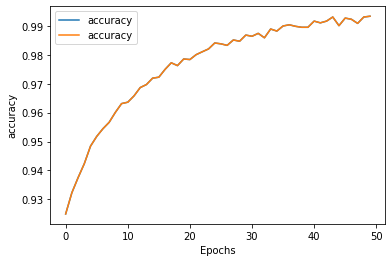

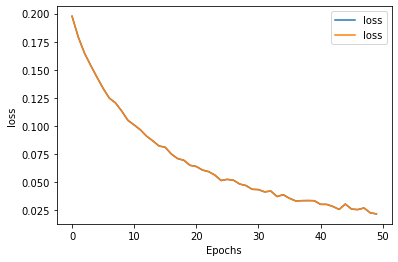

In [58]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [60]:
sentence = ["granny starting to fear spiders in the garden might be real", "game of thrones season finale showing this sunday night"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))

[[9.9968636e-01]
 [6.2434301e-11]]


 first sentense - value 1 (which has high chance to be sarcams)
 second - low chance